# Examining variables with high correlation to increase accuracy and analyze feature importance

## Pre-process data

#### For now, we will look only at continuous values, and then add in our categorical values

In [94]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [95]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
from math import sqrt

In [96]:
#Import data and analyze
data = r'/Users/OliverPan/Desktop/house/train.csv'

In [97]:
df = pd.read_csv(data)

In [98]:
high_corr = df.corr()["SalePrice"].to_frame().sort_values(by=["SalePrice"])
high_corr = high_corr[high_corr["SalePrice"] > 0.6]

In [99]:
#Take high correlation (above 0.6) into model
corr_df = df[["SalePrice", "OverallQual","GrLivArea","GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]]

### Basic Analysis

#### It seems that the garage and square feet are highly correlated to SalePrice

In [100]:
corr_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
0,208500,7,1710,2,548,856,856
1,181500,6,1262,2,460,1262,1262
2,223500,7,1786,2,608,920,920
3,140000,7,1717,3,642,756,961
4,250000,8,2198,3,836,1145,1145


#### OverallQual is the highest correlated variable

In [111]:
corr_df["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

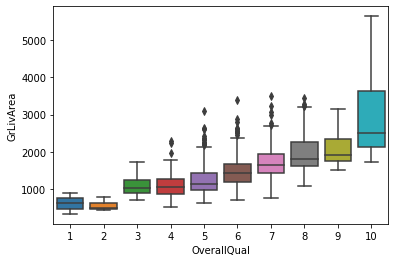

In [120]:
sns.boxplot(y = corr_df["GrLivArea"], x = corr_df["OverallQual"])

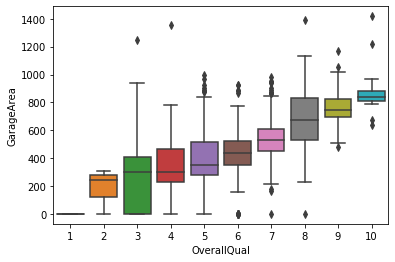

In [121]:
sns.boxplot(y = corr_df["GarageArea"], x = corr_df["OverallQual"])

In [101]:
X = corr_df.drop(["SalePrice"], axis = 1)
y = corr_df[["SalePrice"]]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)

In [103]:
cat_boost = CatBoostRegressor(depth=3, learning_rate=0.1, loss_function='RMSE')
cat_boost.fit(X_train, y_train)

0:	learn: 74166.8543431	total: 1.26ms	remaining: 1.25s
1:	learn: 69809.2658956	total: 2.07ms	remaining: 1.03s
2:	learn: 66069.6463794	total: 2.73ms	remaining: 908ms
3:	learn: 62528.4062641	total: 3.56ms	remaining: 886ms
4:	learn: 59750.1911145	total: 4.01ms	remaining: 798ms
5:	learn: 56878.5476623	total: 4.45ms	remaining: 737ms
6:	learn: 54383.7220367	total: 4.89ms	remaining: 694ms
7:	learn: 52266.6163345	total: 5.76ms	remaining: 714ms
8:	learn: 50452.4956133	total: 6.39ms	remaining: 704ms
9:	learn: 48509.8453226	total: 7.01ms	remaining: 694ms
10:	learn: 46838.3050174	total: 7.59ms	remaining: 682ms
11:	learn: 45342.5724047	total: 8.14ms	remaining: 670ms
12:	learn: 43887.7957436	total: 8.74ms	remaining: 664ms
13:	learn: 42467.9977952	total: 9.33ms	remaining: 657ms
14:	learn: 41358.9297767	total: 10.1ms	remaining: 663ms
15:	learn: 40435.4442808	total: 10.7ms	remaining: 658ms
16:	learn: 39598.8037651	total: 11.1ms	remaining: 644ms
17:	learn: 38942.1304829	total: 11.6ms	remaining: 634ms
18

301:	learn: 22143.6797171	total: 163ms	remaining: 377ms
302:	learn: 22141.2696940	total: 164ms	remaining: 376ms
303:	learn: 22130.7671142	total: 164ms	remaining: 376ms
304:	learn: 22119.4692084	total: 165ms	remaining: 376ms
305:	learn: 22109.4411668	total: 166ms	remaining: 376ms
306:	learn: 22102.6308280	total: 166ms	remaining: 376ms
307:	learn: 22090.4558858	total: 167ms	remaining: 375ms
308:	learn: 22072.6227776	total: 168ms	remaining: 375ms
309:	learn: 22056.8843326	total: 168ms	remaining: 375ms
310:	learn: 22020.7612434	total: 169ms	remaining: 374ms
311:	learn: 21995.6686892	total: 170ms	remaining: 374ms
312:	learn: 21982.2770024	total: 170ms	remaining: 374ms
313:	learn: 21965.5956042	total: 171ms	remaining: 373ms
314:	learn: 21944.0504153	total: 171ms	remaining: 373ms
315:	learn: 21936.1140117	total: 172ms	remaining: 372ms
316:	learn: 21929.4397966	total: 173ms	remaining: 372ms
317:	learn: 21914.0652182	total: 173ms	remaining: 372ms
318:	learn: 21902.4043387	total: 175ms	remaining

572:	learn: 19058.9589570	total: 326ms	remaining: 243ms
573:	learn: 19050.5920242	total: 327ms	remaining: 242ms
574:	learn: 19036.3350926	total: 328ms	remaining: 242ms
575:	learn: 19028.8363795	total: 328ms	remaining: 242ms
576:	learn: 19010.5781254	total: 329ms	remaining: 241ms
577:	learn: 18995.2827187	total: 330ms	remaining: 241ms
578:	learn: 18992.8709502	total: 331ms	remaining: 241ms
579:	learn: 18980.8664372	total: 331ms	remaining: 240ms
580:	learn: 18964.0145246	total: 332ms	remaining: 239ms
581:	learn: 18955.9912649	total: 333ms	remaining: 239ms
582:	learn: 18946.5789007	total: 333ms	remaining: 238ms
583:	learn: 18937.4845480	total: 334ms	remaining: 238ms
584:	learn: 18928.7384988	total: 335ms	remaining: 237ms
585:	learn: 18927.6626375	total: 335ms	remaining: 237ms
586:	learn: 18917.5024127	total: 336ms	remaining: 237ms
587:	learn: 18903.8818958	total: 337ms	remaining: 236ms
588:	learn: 18901.4699630	total: 338ms	remaining: 236ms
589:	learn: 18894.8150303	total: 339ms	remaining

859:	learn: 16951.7048326	total: 489ms	remaining: 79.6ms
860:	learn: 16949.3818776	total: 490ms	remaining: 79.1ms
861:	learn: 16942.8698520	total: 491ms	remaining: 78.6ms
862:	learn: 16941.4972686	total: 492ms	remaining: 78.1ms
863:	learn: 16935.5679746	total: 493ms	remaining: 77.6ms
864:	learn: 16925.8301245	total: 493ms	remaining: 77ms
865:	learn: 16920.4569561	total: 494ms	remaining: 76.4ms
866:	learn: 16913.4832207	total: 495ms	remaining: 75.9ms
867:	learn: 16907.6874016	total: 495ms	remaining: 75.3ms
868:	learn: 16904.7691059	total: 496ms	remaining: 74.7ms
869:	learn: 16903.6840594	total: 496ms	remaining: 74.2ms
870:	learn: 16896.2194412	total: 497ms	remaining: 73.6ms
871:	learn: 16896.0847079	total: 498ms	remaining: 73.1ms
872:	learn: 16887.1553936	total: 499ms	remaining: 72.6ms
873:	learn: 16877.8508695	total: 509ms	remaining: 73.5ms
874:	learn: 16875.3589903	total: 511ms	remaining: 73.1ms
875:	learn: 16872.8042755	total: 513ms	remaining: 72.7ms
876:	learn: 16866.6917350	total: 

In [104]:
y_pred = cat_boost.predict(X_test)

In [105]:
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head()

,Actual,Predicted
0,200624,205138.547600
1,133000,147799.438700
2,110000,106126.255987
3,192000,231023.412224
4,88000,101706.194172


In [106]:
## We should also look at RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

32644.075649803533

In [107]:
## Normalised RMSE
sqrt(mean_squared_error(y_test, y_pred)) / (y_test["SalePrice"].max() - y_test["SalePrice"].min())

0.04713945942209897